*<sup>+ This notebook is based on Corey MS's awesome [matplotlib series](https://www.youtube.com/playlist?list=PL-osiE80TeTvipOqomVEeZ1HRrcEvtZB_).</sup>*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
# list of available plot styles
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [3]:
# data to plot
ages_x = [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]

py_dev_y = [20046, 17100, 20000, 24744, 30500, 37732, 41247, 45372, 48876, 53850, 57287, 63016, 65998, 70003, 70000, 71496, 75370, 83640, 84666, 84392, 78254, 85000, 87038, 91991, 100000, 94796, 97962, 93302, 99240, 102736, 112285, 100771, 104708, 108423, 101407, 112542, 122870, 120000]

js_dev_y = [16446, 16791, 18942, 21780, 25704, 29000, 34372, 37810, 43515, 46823, 49293, 53437, 56373, 62375, 66674, 68745, 68746, 74583, 79000, 78508, 79996, 80403, 83820, 88833, 91660, 87892, 96243, 90000, 99313, 91660, 102264, 100000, 100000, 91660, 99240, 108000, 105000, 104000]

dev_y = [17784, 16500, 18012, 20628, 25206, 30252, 34368, 38496, 42000, 46752, 49320, 53200, 56000, 62316, 64928, 67317, 68748, 73752, 77232, 78000, 78508, 79536, 82488, 88935, 90000, 90056, 95000, 90000, 91633, 91660, 98150, 98964, 100000, 98988, 100000, 108923, 105000, 103117]

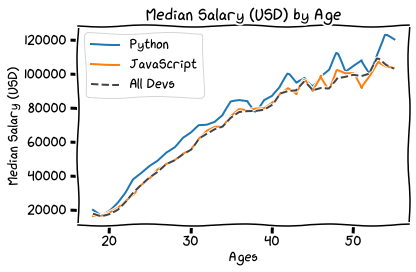

In [4]:
with plt.xkcd():

    plt.plot(ages_x, py_dev_y, label='Python')
    plt.plot(ages_x, js_dev_y, label='JavaScript')
    plt.plot(ages_x, dev_y, color='#444444', linestyle='--', label='All Devs')

    plt.xlabel('Ages')
    plt.ylabel('Median Salary (USD)')
    plt.title('Median Salary (USD) by Age')

    plt.legend()
    plt.tight_layout()
    plt.savefig('plots/plot-1.png')

    plt.show()
    plt.close()

## Bar Charts

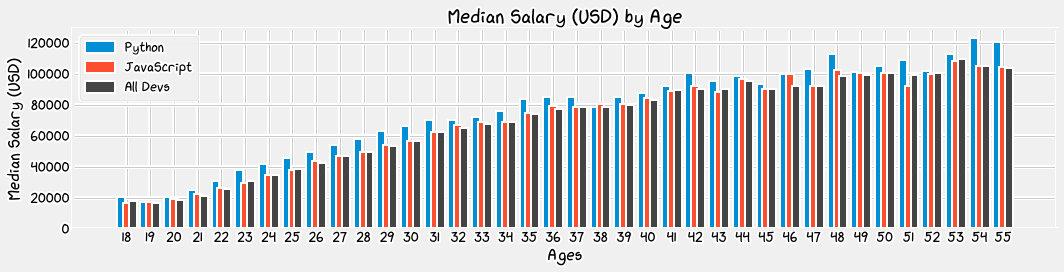

In [5]:

x_indexes = np.arange(len(ages_x))
width = 0.25

with plt.xkcd(False):
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(15,4))

    plt.bar(x_indexes - width, py_dev_y, width=width, label='Python')
    plt.bar(x_indexes, js_dev_y, width=width, label='JavaScript')
    plt.bar(x_indexes + width, dev_y, width=width, color='#444444', label='All Devs')

    plt.title('Median Salary (USD) by Age')
    plt.xlabel('Ages')
    plt.ylabel('Median Salary (USD)')

    plt.xticks(ticks=x_indexes, labels=ages_x)

    plt.legend()
    plt.tight_layout()
    plt.savefig('plots/plot-2.png')

    plt.show()
    plt.close()

In [6]:
data = pd.read_csv('data/data1.csv')
ids = data['Responder_id']
lang_responses = data['LanguagesWorkedWith']

language_counter = Counter()

for response in lang_responses:
    language_counter.update(response.split(';'))

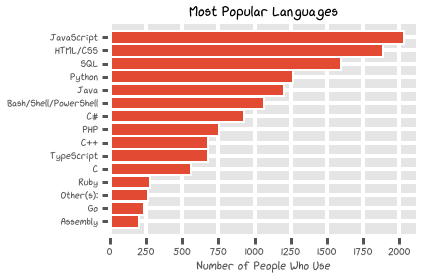

In [7]:
languages = []
popularity = []

for item in language_counter.most_common(15):
    languages.append(item[0])
    popularity.append(item[1])

languages.reverse()
popularity.reverse()

with plt.xkcd(False):
    plt.style.use('ggplot')
    plt.barh(languages, popularity)
    plt.title('Most Popular Languages')
    plt.xlabel('Number of People Who Use')

    plt.tight_layout()
    plt.savefig('plots/plot-3.png')

    plt.show()
    plt.close()

## Pie Charts

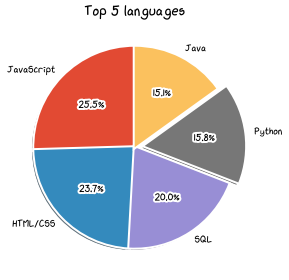

In [8]:
labels = []
slices = []

for item in language_counter.most_common(5):
    labels.append(item[0])
    slices.append(item[1])


explode = [0, 0, 0, 0.1, 0]

with plt.xkcd(False):
    plt.style.use('ggplot')
    plt.pie(slices, labels=labels, explode=explode, shadow=True,
            startangle=90, autopct='%1.1f%%')

    plt.title("Top 5 languages")
    plt.tight_layout()
    plt.savefig('plots/plot-4.png')
    plt.show()
    plt.close()

## Stack plots

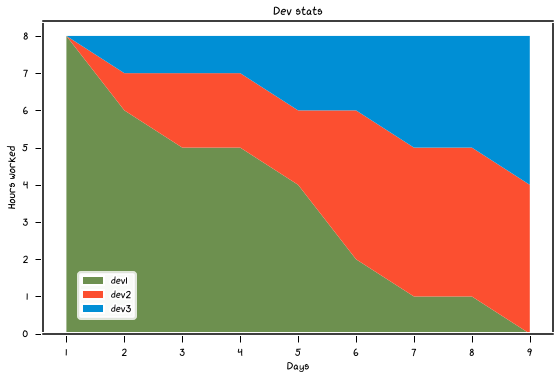

In [9]:
days = [1, 2, 3, 4, 5, 6, 7, 8, 9]

dev1 = [8, 6, 5, 5, 4, 2, 1, 1, 0]
dev2 = [0, 1, 2, 2, 2, 4, 4, 4, 4]
dev3 = [0, 1, 1, 1, 2, 2, 3, 3, 4]

labels = ['dev1', 'dev2', 'dev3']
colors = ['#6d904f', '#fc4f30', '#008fd5']

with plt.xkcd(False):
    plt.style.use("seaborn-notebook")
    plt.stackplot(days, dev1, dev2, dev3, labels=labels, colors=colors)

    plt.legend(loc=(0.07, 0.05))

    plt.title("Dev stats")
    plt.xlabel("Days")
    plt.ylabel("Hours worked")
    plt.tight_layout()
    plt.savefig('plots/plot-5.png')
    plt.show()
    plt.close()

## Filling Area on Line Plots

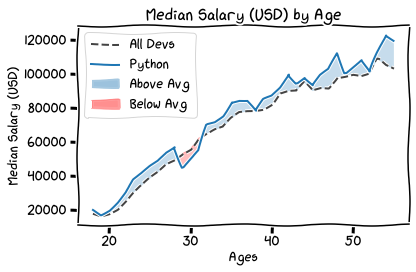

In [10]:
data = pd.read_csv('data/data2.csv')
ages = data['Age']
dev_salaries = data['All_Devs']
py_salaries = data['Python']
js_salaries = data['JavaScript']

with plt.xkcd():
    plt.plot(ages, dev_salaries, color='#444444',
            linestyle='--', label='All Devs')

    plt.plot(ages, py_salaries, label='Python')

    # overall_median = 57287

    plt.fill_between(ages, py_salaries, dev_salaries,
                    where=(py_salaries > dev_salaries),
                    interpolate=True, alpha=0.25, label='Above Avg')

    plt.fill_between(ages, py_salaries, dev_salaries,
                    where=(py_salaries <= dev_salaries),
                    interpolate=True, color='red', alpha=0.25, label='Below Avg')

    plt.legend()

    plt.title('Median Salary (USD) by Age')
    plt.xlabel('Ages')
    plt.ylabel('Median Salary (USD)')

    plt.tight_layout()
    plt.savefig('plots/plot-6.png')
    plt.show()
    plt.close()

## Histograms

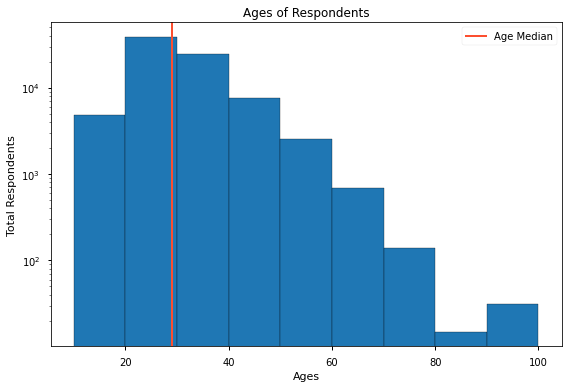

In [11]:
data = pd.read_csv('data/data3.csv')
ids = data['Responder_id']
ages = data['Age']

bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# with plt.xkcd(False):
plt.style.use('seaborn-notebook')
plt.hist(ages, bins=bins, edgecolor='black', log=True)

median_age = 29
color = '#fc4f30'

plt.axvline(median_age, color=color, label='Age Median', linewidth=2)
plt.legend()

plt.title('Ages of Respondents')
plt.xlabel('Ages')
plt.ylabel('Total Respondents')

plt.tight_layout()
plt.savefig('plots/plot-7.png')
plt.show()
plt.close()

## Scatter Plots

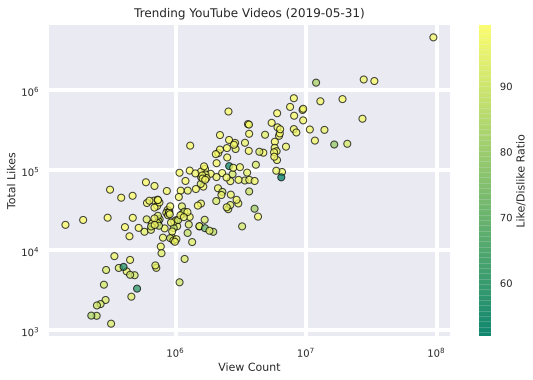

In [12]:
data = pd.read_csv('data/data4.csv')
view_count = data['view_count']
likes = data['likes']
ratio = data['ratio']

with plt.xkcd(False):
    plt.style.use('seaborn')
    plt.scatter(view_count, likes, c=ratio, cmap='summer',
                edgecolor='black', linewidth=1, alpha=0.75)

    cbar = plt.colorbar()
    cbar.set_label('Like/Dislike Ratio')

    plt.xscale('log')
    plt.yscale('log')

    plt.title('Trending YouTube Videos (2019-05-31)')
    plt.xlabel('View Count')
    plt.ylabel('Total Likes')

    plt.tight_layout()
    plt.savefig('plots/plot-8.png')
    plt.show()
    plt.close()

## Plotting Time Series Data

In [13]:
from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates

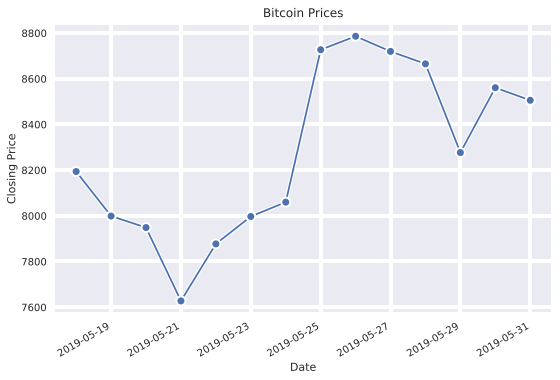

In [14]:
data = pd.read_csv('data/data5.csv')

data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)

price_date = data['Date']
price_close = data['Close']

with plt.xkcd(False):
    plt.style.use('seaborn')
    plt.plot_date(price_date, price_close, linestyle='solid')

    plt.gcf().autofmt_xdate()

    plt.title('Bitcoin Prices')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')

    plt.tight_layout()
    plt.savefig('plots/plot-9.png')
    plt.show()
    plt.close()

## Subplots

In [15]:
data = pd.read_csv('data/data2.csv')
ages = data['Age']
dev_salaries = data['All_Devs']
py_salaries = data['Python']
js_salaries = data['JavaScript']

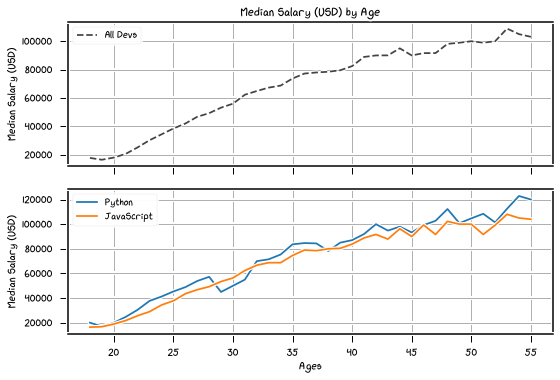

In [16]:
with plt.xkcd(False):
    plt.style.use('seaborn-notebook')
    
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True)

    ax1.plot(ages, dev_salaries, color='#444444',
            linestyle='--', label='All Devs')

    ax2.plot(ages, py_salaries, label='Python')
    ax2.plot(ages, js_salaries, label='JavaScript')

    ax1.legend()
    ax1.set_title('Median Salary (USD) by Age')
    ax1.set_ylabel('Median Salary (USD)')
    ax1.grid(True)

    ax2.legend()
    ax2.set_xlabel('Ages')
    ax2.set_ylabel('Median Salary (USD)')
    ax2.grid(True)

    plt.tight_layout()
    fig.savefig('plots/fig.png')
    plt.show()
    plt.close()